In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import pytesseract as pt
from pathlib import Path

## Visualization of each image

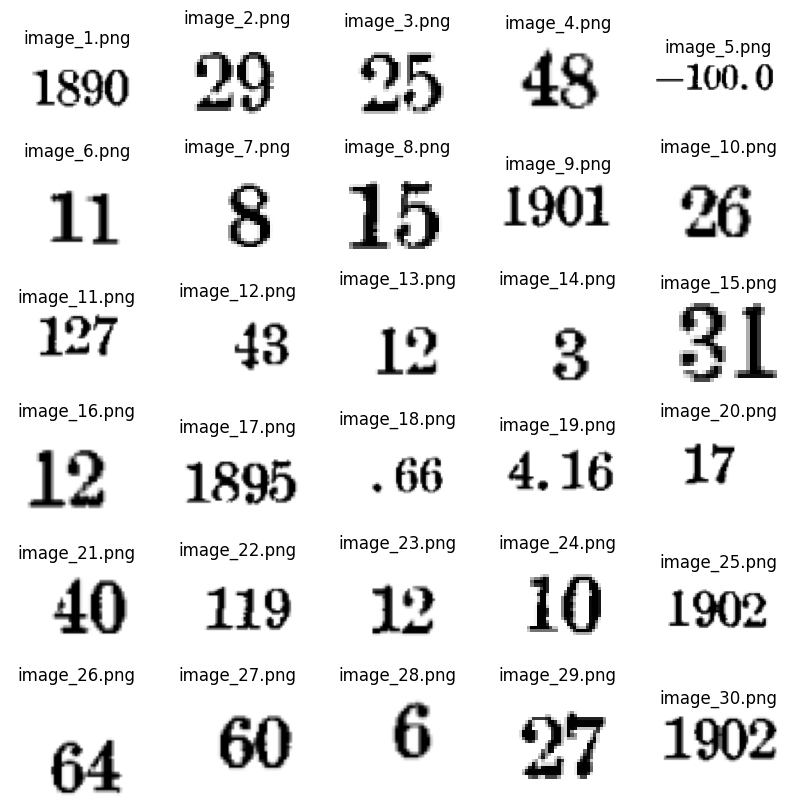

In [48]:
fig, axs = plt.subplots(6, 5, figsize = (10, 10))
axs = axs.flatten()
for i in range(1,31):
    axs[i-1].imshow(plt.imread(f"image_{i}.png"))
    axs[i-1].axis('off')
    image_id = f"image_{i}.png"
    axs[i-1].set_title(image_id)
plt.show()

# PyTesseract Approach

In [15]:
def file_number(filename):
    return int(filename.stem.split('_')[-1])

files = sorted(Path().glob('*.png'), key = file_number)
for file in files:
    print(f"{file}: {pt.image_to_string(Image.open(file))}")

image_1.png: 1890

image_2.png: 
image_3.png: 
image_4.png: 48

image_5.png: —100.0

image_6.png: 11

image_7.png: 
image_8.png: 
image_9.png: 1901

image_10.png: 
image_11.png: 127

image_12.png: 43

image_13.png: 2

image_14.png: 
image_15.png: 
image_16.png: 
image_17.png: 1895

image_18.png: - 66

image_19.png: 4.16

image_20.png: 
image_21.png: 40

image_22.png: 119

image_23.png: 12

image_24.png: 
image_25.png: 1902

image_26.png: 
image_27.png: 
image_28.png: 
image_29.png: 
image_30.png: 1902



After running PyTesseract on all 30 images, the model was only able to come up with an answer for 16 of them, which is not a great success rate. 

# EasyOCR Approach

In [18]:
from easyocr import Reader
reader = Reader(['en'], gpu = False)

Using CPU. Note: This module is much faster with a GPU.


In [19]:
for i in range(1,31):
    results = reader.readtext(f"image_{i}.png")
    if len(results) > 0:
        print(f"image_{i}.png: {results[0][1]}")
    else:
        print(f"image_{i}.png: ")
     
# better than before, but still some issues reading negative signs 
# and decimals in some cases

image_1.png: 1890
image_2.png: 29
image_3.png: 25
image_4.png: 48
image_5.png: 100.0
image_6.png: 11
image_7.png: 8
image_8.png: 15
image_9.png: 1901
image_10.png: 26
image_11.png: 127
image_12.png: 43
image_13.png: 12
image_14.png: 3
image_15.png: 31
image_16.png: 12
image_17.png: 1895
image_18.png: 66
image_19.png: 4.16
image_20.png: 17
image_21.png: 40
image_22.png: 119
image_23.png: 12
image_24.png: 10
image_25.png: 1902
image_26.png: 64
image_27.png: 60
image_28.png: 
image_29.png: 27
image_30.png: 1902


The EasyOCR model was able to come up with an answer for 29 out of the 30. However it did have some issues reading negative signs and decimals at times. For example the answer for `image_5.png` should be `-100.0`, but the model is incapable of reading that negative sign. Additionally, on `image_18.png` the answer is `.66` but the model can't read the negative.